In [17]:
!pip install -q pydot
!apt install -y graphviz
!pip install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


**Prepare data**

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder


data = pd.read_csv('/content/drive/MyDrive/CPE-443/V3/Project_443_Modify_Remake_V3.csv')
data

,How often do you drink alcohol in one month,Place that you drink,What type of alcohol do you like,Who do you drink with,What do you like to do when drinking,Do you allergy with alcohol
0,มากกว่า 10 ครั้ง,บ้าน,เหล้า,แฟน,นอน,ไม่แพ้
1,มากกว่า 10 ครั้ง,สถานบันเทิง,ค็อกเทล,แฟน,อ่านหนังสือ,ไม่แพ้
2,1-5 ครั้ง,บ้าน,เบียร์,เพื่อน,พูดคุยกับคนอื่น,ไม่แพ้
3,1-5 ครั้ง,สถานบันเทิง,เบียร์,ญาติ,เล่นมือถือ,ไม่แพ้
4,6-10 ครั้ง,สถานบันเทิง,ไวน์,ดื่มคนเดียว,พูดคุยกับคนอื่น,ไม่แพ้
...,...,...,...,...,...,...
80,มากกว่า 10 ครั้ง,สถานบันเทิง,เบียร์,เพื่อน,พูดคุยกับคนอื่น,ไม่แพ้
81,1-5 ครั้ง,บ้าน,เบียร์,ดื่มคนเดียว,พูดคุยกับคนอื่น,ไม่แพ้
82,มากกว่า 10 ครั้ง,สถานที่ท่องเที่ยว,เหล้า,เพื่อน,เต้น,ไม่แพ้
83,มากกว่า 10 ครั้ง,บ้าน,ไวน์,ดื่มคนเดียว,ทำงาน,ไม่แพ้


In [21]:
X = data.iloc[:,7:12]


def labelEncode(data, column):
    for i in columns:
      lb = LabelEncoder().fit_transform(data[i])
      data[i + '_'] = lb

columns = ['How often do you drink alcohol in one month', 'Place that you drink', 'What type of alcohol do you like','Who do you drink with','What do you like to do when drinking', 'Do you allergy with alcohol']
labelEncode(data, columns)
X

,Place that you drink_,What type of alcohol do you like_,Who do you drink with_,What do you like to do when drinking_,Do you allergy with alcohol_
0,0,3,5,3,1
1,3,0,5,6,1
2,0,2,4,4,1
3,3,2,1,8,1
4,3,4,2,4,1
...,...,...,...,...,...
80,3,2,4,4,1
81,0,2,2,4,1
82,2,3,4,7,1
83,0,4,2,2,1


In [22]:
y = data.iloc[:,6:7]
y

,How often do you drink alcohol in one month_
0,2
1,2
2,0
3,0
4,1
...,...
80,2
81,0
82,2
83,2


**Model ที่ใช้**

In [23]:
model = DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier()

In [25]:
X
y_predict = model.predict(X)

class_names = ['1-5 time', '6-10 time', 'more than 10 time']
prd = class_names[y_predict[0]]
print('Result : {}'.format(prd))

Result : more than 10 time


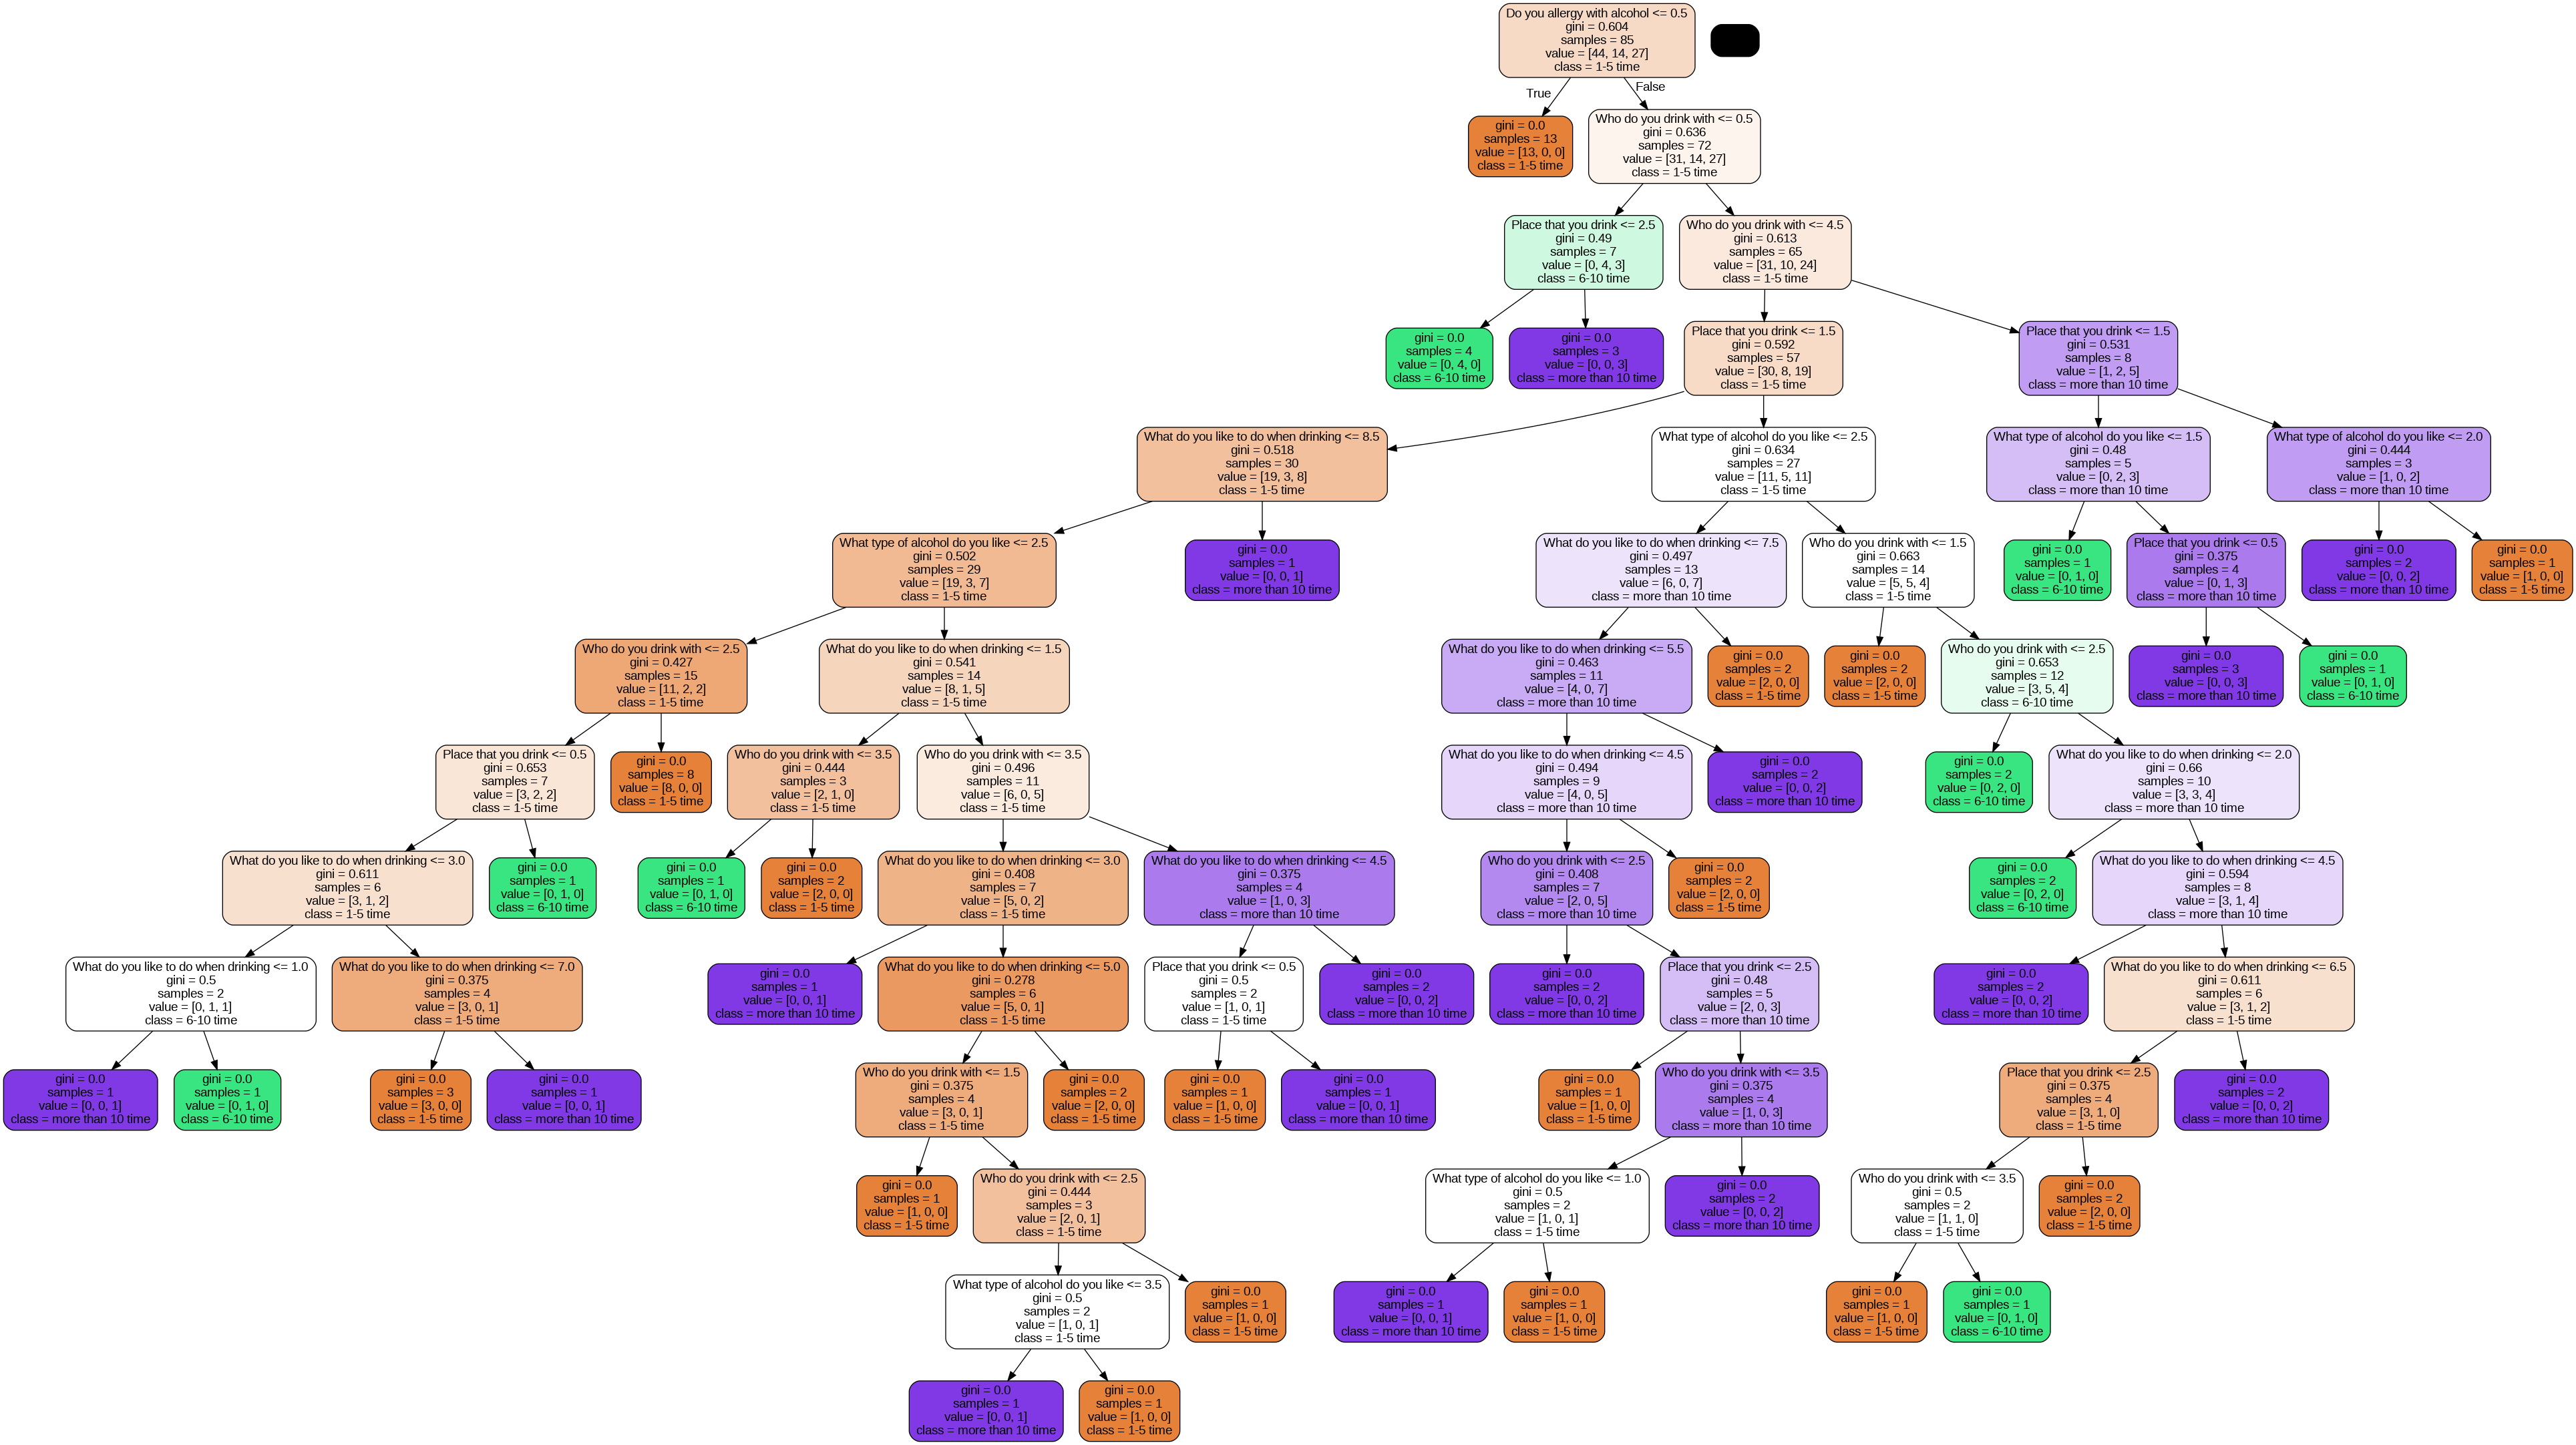

In [26]:
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image

data_feature_names = 'Place that you drink', 'What type of alcohol do you like','Who do you drink with','What do you like to do when drinking', 'Do you allergy with alcohol'
dot_data = export_graphviz(model, out_file = None,
                           feature_names = data_feature_names,
                           class_names = class_names,
                           filled = True,
                           rounded = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
model.score(X, y)

0.9770114942528736